## Big Mart Analysis

### <p style="color: yellow;">Problem Formulation:</p>

For a mart with 10 branches in different locations, is there a way to predict the sales of a certain product at each store? 
This could help with:
    - Increasing the sales at each sales point
    - Managing the Weekly, monthly, Yearly spendings


### Hypothesis Generation:
    - The sales for some products may always be the same for all locations
    - Some Regions will buy the most expensive stuff, while others buy the least expensive ones
    - The sales for other products may depend on the areas needs 
    - For small markets the sales are low while for big ones the sales are high
    - Many people will avoid buying products with fat 

## Loading Packages

In [48]:
# Loading packages
import pandas as pd
import numpy as np
import seaborn as sns


In [70]:
df = pd.read_csv("./data/Train.csv")
df.shape

(8523, 12)

## Data Structure and Content

In [50]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [52]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


## EDA:


## Duplicates:


In [73]:
df.duplicated().sum()

0

<Axes: >

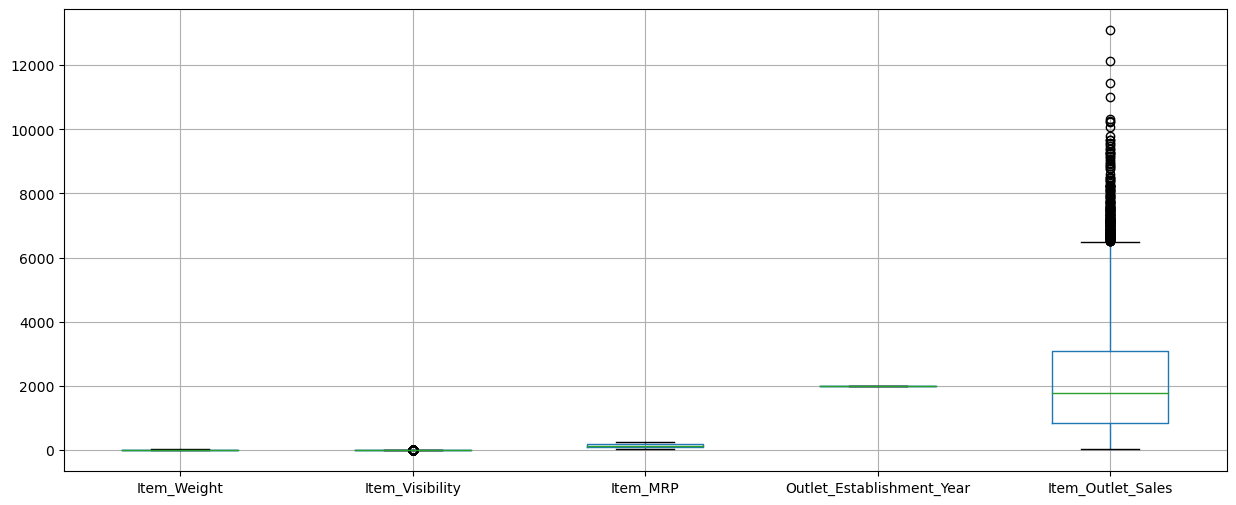

In [65]:
df.boxplot(figsize=(15, 6))

We notice that the outlet_sales varies a lot amd has many outliers, We also found outliers withing Item Visibility column which we will check

<Axes: >

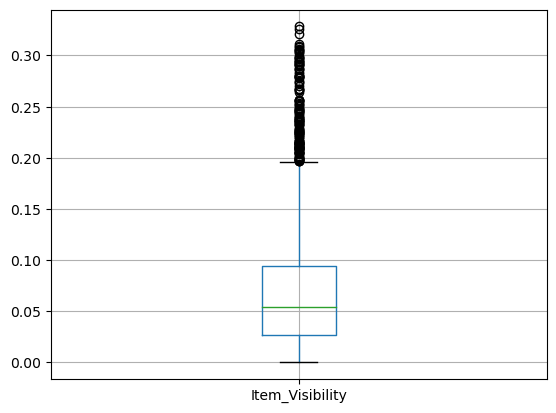

In [101]:
df.boxplot("Item_Visibility")

In [104]:
q3 = np.percentile(df["Item_Visibility"], 75)
q1 = np.percentile(df["Item_Visibility"], 25)
upper_bound = ( q3 + 1.5 * ( q3 - q1 ))
np.array(np.where(df["Item_Visibility"] > upper_bound )).shape[1]

144

Out of 8523 rows we got 144 rows with outlier values for item visibilit which represents 1%  of the data, so we can drop it or bound the visibility, then perform min max scaling. 

In [107]:
df.loc[df["Item_Visibility"] > upper_bound, "Item_Visibility"] = upper_bound

removed outliers from item Item_Visibility, now perform min max scaling to [0 - 1]

In [110]:
df["Item_Visibility"] = (df["Item_Visibility"] - np.min(df["Item_Visibility"])) /  (np.max(df["Item_Visibility"]) -  np.min(df["Item_Visibility"]))

<Axes: >

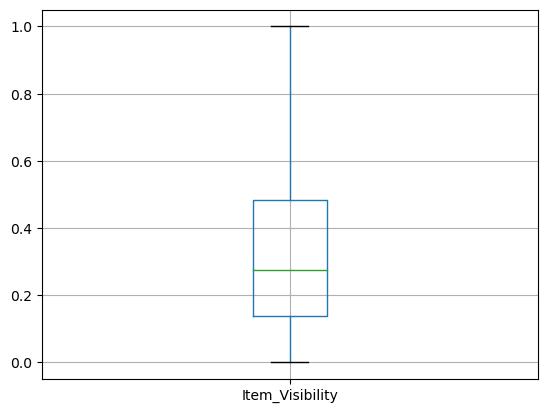

In [111]:
df.boxplot("Item_Visibility")

## Univariate:

<Axes: >

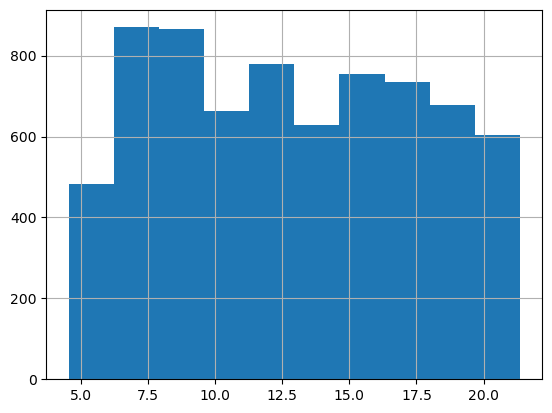

In [117]:
df["Item_Weight"].hist()

In [118]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.081883,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.098369,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.085520,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [126]:
outlet_ids = df["Outlet_Identifier"].unique()
outlet_ids.shape[0]

10

We have 10 differente outlets

In [128]:
item_types = df["Item_Type"].unique()
item_types

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [130]:
max_weight = np.max(df["Item_Weight"])
min_weight = np.min(df["Item_Weight"])

(max_weight, min_weight)

(21.35, 4.555)

In [131]:
max_year = np.max(df["Outlet_Establishment_Year"])
min_year = np.min(df["Outlet_Establishment_Year"])

(max_year, min_year)

(2009, 1985)

## Bivariate

In [133]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.081883,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.098369,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.085520,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


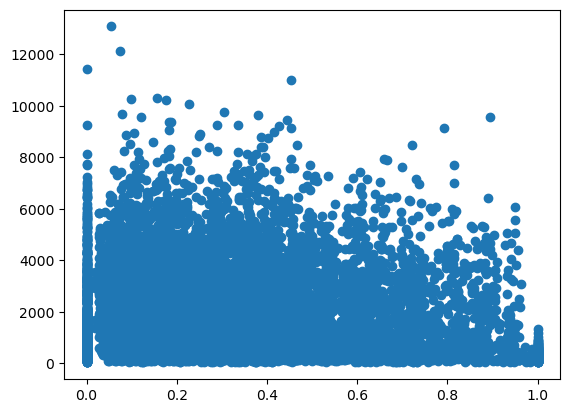

In [146]:
plt.scatter(df["Item_Visibility"].values, df["Item_Outlet_Sales"].values)

In [150]:
fat_content = df["Item_Fat_Content"] .unique()
fat_content

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f1cc44638d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f1cc44709d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f1cc4462f90>,
 'medians': [<matplotlib.lines.Line2D at 0x7f1cc4471a50>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f1cc4463790>,
 'means': []}

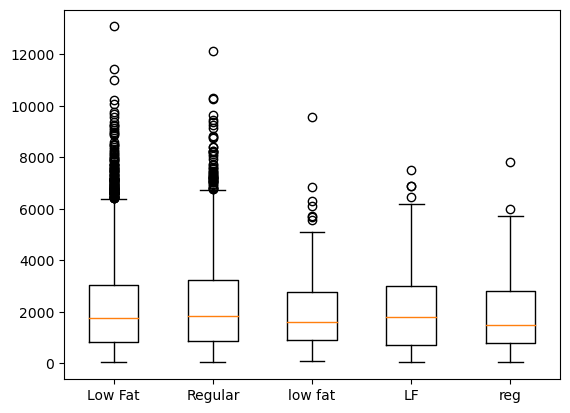

In [152]:
plt.boxplot([df[df["Item_Fat_Content"] == i]["Item_Outlet_Sales"] for i in fat_content],labels=fat_content,)

## Missing Value Treatment

In [10]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

We can see that we have missing values in Item weight amd outlet_size, We will check if there is a methode to fill the weights based on the weights of similar products.

We will check if the item identifier is unique for each row

In [11]:
df["Item_Identifier"].nunique()

1559

In [12]:
df["Item_Identifier"].nunique() / df.shape[0]

0.18291681332864015

This means that the Ids are not unique to each row, hence there is a possibility to fill the weight with the value from another prodect with the same id

In [13]:
df[df["Item_Identifier"] == "FDA15"]["Item_Identifier"]

0       FDA15
831     FDA15
2599    FDA15
2643    FDA15
4874    FDA15
5413    FDA15
6696    FDA15
7543    FDA15
Name: Item_Identifier, dtype: object

As we can see here, all the values have been imputed by the mean 

In [14]:

for i in df["Item_Identifier"].unique():
    df.loc[df["Item_Identifier"] == i, "Item_Weight"] = df[df["Item_Identifier"] == i]["Item_Weight"].mean()

In [15]:

df.isna().sum()

Item_Identifier                 0
Item_Weight                     4
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [16]:
df["Outlet_Size"].mode()

0    Medium
Name: Outlet_Size, dtype: object

In [17]:

df["Outlet_Size"].fillna("Medium", inplace=True)

In [18]:
df.isna().sum()

Item_Identifier              0
Item_Weight                  4
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [19]:
df.dropna(inplace=True)